In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from datetime import date
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as ss
from scipy.stats import skew
import math
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [69]:
TrainData = pd.read_csv('train.csv')
TestData = pd.read_csv('test.csv')


In [70]:
# Attempting a Different methodology when working with factor analysis.
# Since it's dimensional reduction, -- so I don't see a particular need to reduce features.
#TrainTarget = TrainData[['SalePrice']]
TrainTarget = TrainData['SalePrice']


In [71]:
TrainData.drop(['SalePrice'], axis =1, inplace=True) #So long as properly ordered, this will be fine.


In [72]:
TrainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [73]:
#Attempting maximum potential coverage of dummy variables.
TrainTest = TrainData.append(TestData) 
TrainTest.to_csv('TrainTestCheck1.csv')

In [74]:
TrainTest.select_dtypes(include='object').isnull().sum()[TrainTest.select_dtypes(include='object').isnull().sum()>0]

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [75]:
TrainTest.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [76]:
for col in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
           'PoolQC','Fence','MiscFeature'):
    TrainTest[col]=TrainTest[col].fillna('None')

In [77]:
TrainTest.select_dtypes(include='object').isnull().sum()[TrainTest.select_dtypes(include='object').isnull().sum()>0]

MSZoning       4
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [78]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    TrainTest[col]=TrainTest[col].fillna(TrainTest[col].mode()[0])

In [79]:
TrainTest.select_dtypes(include=['int','float']).isnull().sum()[TrainTest.select_dtypes(include=['int','float']).isnull().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [80]:
for col in ('LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt'):
    TrainTest[col]=TrainTest[col].fillna(1)

In [81]:
#Harmonizing coding on 'Quality' metrics. Overall Qual is numeric, while these others are categorical.
#Ordinal assignments seem most appropriate for 9 point scales
for col in ('ExterQual','HeatingQC','FireplaceQu','GarageQual','KitchenQual','BsmtQual','BsmtCond','GarageCond','PoolQC'):
    TrainTest[col][TrainTest[col] == 'Ex'] = 9
    TrainTest[col][TrainTest[col] == 'Gd'] = 7
    TrainTest[col][TrainTest[col] == 'TA'] = 5
    TrainTest[col][TrainTest[col] == 'Fa'] = 3
    TrainTest[col][TrainTest[col] == 'Po'] = 1
    TrainTest[col][TrainTest[col] == 'NA'] = 0
    TrainTest[col][TrainTest[col] == 'None'] = 0
    TrainTest[col].astype('int64')

In [82]:
TrainTest.to_csv('TrainTestCheck2.csv')
T2 = pd.DataFrame(TrainTest)
T2.corr().to_csv('TrainCorrelations2.csv')

In [83]:
TrainTest = pd.get_dummies(TrainTest,dummy_na=True)

In [84]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
transformer = FactorAnalysis(n_components=7, random_state=0)
TrainTest_transformed = transformer.fit_transform(TrainTest)
TrainTest_transformed.shape

(2919, 7)

In [85]:
Train = TrainTest.iloc[:1460]
Test = TrainTest.iloc[1460:]

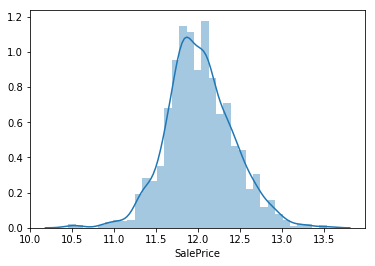

In [86]:
#sns.distplot(TrainData['TotRmsAbvGrd']);
#sns.distplot(TrainData['1stFlrSF']);
#sns.distplot(TrainData['OverallQual']);
#sns.distplot(TrainData['FullBath']);
#sns.distplot(TrainData['YearRemodAdd']);
#sns.distplot(TrainData['YearBuilt']);
#sns.distplot(TrainData['ExterQual']);
#sns.distplot(TrainData['LotFrontage']);
sns.distplot(np.log(TrainTarget));

In [87]:
sc=RobustScaler()
TrainTest=sc.fit_transform(TrainTest)

In [88]:
Train.to_csv('Traincheck.csv')
Test.to_csv('TestCheck.csv')

Train.corr().to_csv('TrainCorrelations.csv')

y=TrainTarget
y=np.log(y)

In [89]:
# class_weight = {0:0.33, 1:0.67})

LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','GarageYrBlt'

nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

In [90]:
nr.seed(532)
nfolds = 10

#n_estimators=100,random_state=2
RFR = RandomForestRegressor(n_estimators=200) 

param_grid = {"max_features": [5, 9, 14, 20, 25,30,35], "min_samples_leaf":[3, 5, 10, 20]}
grid_search = GridSearchCV(RFR,  param_grid = param_grid, cv=nfolds)
grid_search.fit(Train, y)

#estimator = rf_clf
#GridsearchCV has a couple of helpful attributes:
#1. best_params_
#2. best_estimator_
#3. best_score_
#4. best_index_  --> I don't understand this yet. 

#5. Refit -- will take all of the best parameters and apply them. All of the best atteributes.

#Let's take a look at the random forest classifier's parameters. Let's see...
#Max Features: The number of features to consider when looking for the best split:
#Min Samples Leaf: The minimum number of samples required to be at a leaf node


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [5, 9, 14, 20, 25, 30, 35], 'min_samples_leaf': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
print(grid_search.best_estimator_.max_features)
print(grid_search.best_estimator_.min_samples_leaf)

35
3


In [92]:
#Maybe I'll skip cross validation for this first atttempt -- just attempt to predict. 

RFModel = RandomForestRegressor(n_estimators=200, 
                                max_features = grid_search.best_estimator_.max_features, 
                                min_samples_leaf = grid_search.best_estimator_.min_samples_leaf) 

RFModel.fit(Train, y)

#Josh's method -- cross validation classification. Classification of course wants scoring.
#But regression ALSO does scoring. MSE, for example. RMSE as well, perhaps.


#grid_search = GridSearchCV(RFR,  param_grid = param_grid, cv=nfolds)
#grid_search.fit(Train, y)

#rf_clf = model_selection.GridSearchCV(estimator = rf_clf, param_grid = param_grid, cv = inside, # Use the inside folds 
    #scoring = 'accuracy',
    #return_train_score = True)
#rf_clf.fit(features, outcome)
#cv_estimate = model_selection.cross_val_score(rf_clf, features, outcome,cv = outside) # Use the outside folds

#rf_clf_best_params = RandomForestClassifier(class_weight = "balanced", 
#                               max_features = rf_clf.best_estimator_.max_features, 
 #                               min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=35, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [93]:
Result = pd.DataFrame(RFModel.predict(Train))
Result = np.exp(Result)
Result.to_csv('resultreg13.csv')

#Model1 = RFR.fit(Train, TrainTarget)
#Result = pd.DataFrame(Model1.predict(Test))
#Result.to_csv('resultreg1.csv')


#An Example of SVR and Cross Validation from Medium.com
X = dataset.iloc[:, [0, 12]]
y = dataset.iloc[:, 13]

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    
    
 best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

    #Alternative. The latter gives an example it says.
    
    cross_val_score(best_svr, X, y, cv=10)
    cross_val_predict(best_svr, X, y, cv=10)

nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

nr.seed(1115)
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.33, 1:0.67},
                  probability=True) 
svm_mod.fit(X_train, y_train)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

In [94]:
#print PoiReg.summary()
#Result = pd.DataFrame(PoiReg.predict(Test))
#Result = np.exp(Result)

Result.to_csv('resultreg11.csv')
#Output = pd.DataFrame({'Id':TestData[['Id']], 'SalePrice':Result})
#Output.to_csv('submissiontmb.csv', index=False)